# DC Power estimation

<table>
  <tr>
    <td><img src="logos/CSTB_logo.jpg" width="200" />
    <td><img src="logos/Heliocity_logo.png" width="200" /> 
    <td><img src="logos/USMB_logo_horizontal.png" width="200" />
  </tr>
</table>

<sub>Author: Alexandre MATHIEU, Phd Student, in collaboration Heliocity / CSTB / USMB (LOCIE). </sub>
<sub>Phd thesis: Methodology development to guarantee building photovoltaic systems' performance including failure modelling</sub>

This notebook introduces some tools to automatically detect faults on PV installation which decreases power production.

It is broken down into three parts:

1. **Data visualization**: Exploration of weather and PV data
2. **POA irradiance, temperature, and Power modeling**: Estimation temperature/DC power and comparison to real values.

The attendees are very much welcome to modify and create/execute some new notebook cells to explore data and try out new methods.

The two first parts are used to introduce the subject and the attendees are expected to collaborate and develop detection methods in the part 3. 

**Make sure to manually execute the cells (ctrl + enter) yourself one by one**

## 1. Data vizualization

In [1]:
# Please execute this cell to import packages
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Change the directory path to import functions from local modules
if not 'workbookDir' in globals():
    workbookDir = Path(os.getcwd()).parent
print('Work directory: ' + str(workbookDir))
os.chdir(workbookDir)

from src.config import DATA_PATH # Directory ROOT path
from src.utils.helio_fmt import setup_helio_plt
setup_helio_plt() # set plot format and font


Work directory: C:\Users\MATHIEU\OneDrive - CSTBGroup\Bureau\Code\pvfault_detection_solar_academy


## 1.1. In-situ weather data

In [2]:
# Load satellite weather data: incident irradiation, direct irradiation, temperature, wind
weather_data = pd.read_csv(DATA_PATH / "xtrain.csv", index_col=0) 

print(weather_data.head(10))

                                  ghi        dhi         dni  temp_air  \
2020-01-01 01:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 02:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 03:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 04:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 05:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 06:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 07:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 08:00:00-07:00   40.874978  14.742914  264.832939 -4.737162   
2020-01-01 09:00:00-07:00  185.738601  31.546335  754.498236 -3.652383   
2020-01-01 10:00:00-07:00  353.666975  40.138926  914.471581 -0.708700   

                           wind_speed  sun_azimuth  sun_elevation  
2020-01-01 01:00:00-07:00    0.000000    45.887005     -73.699678  
2020-01-01 02:00:00-07:00    0.000000    60.33037

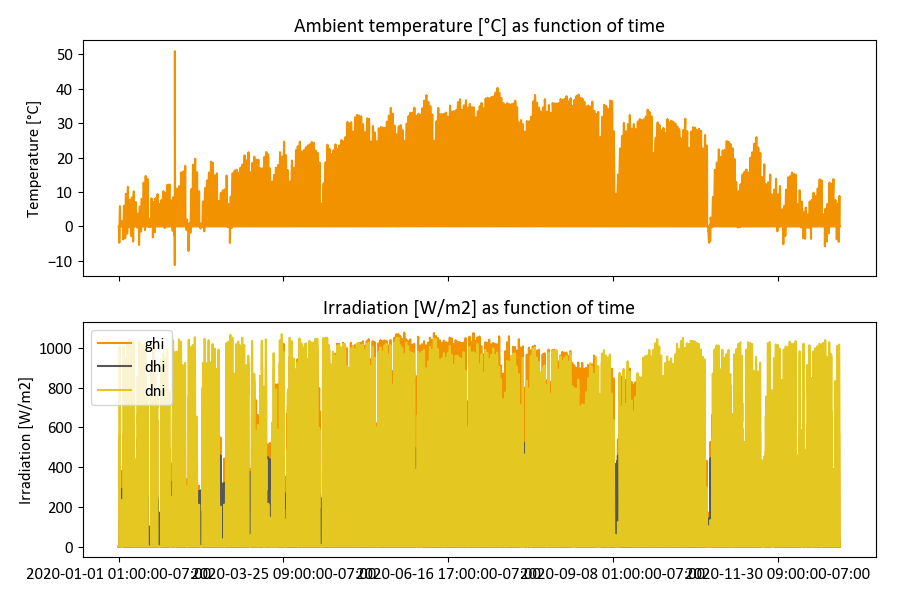

In [7]:
# Make the figure interactive and enable to zoom
%matplotlib widget 
# If the widget does not work, the line below switches to a regular figure
#%matplotlib inline 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,6), sharex=True)
weather_data["temp_air"].plot(ax=ax1, title="Ambient temperature [°C] as function of time",ylabel="Temperature [°C]")
meteo_plot = weather_data[["ghi","dhi", "dni"]]
meteo_plot.plot(ax=ax2, title="Irradiation [W/m2] as function of time",ylabel="Irradiation [W/m2]")
plt.tight_layout()

## 2. DC power estimation

Modeling PV power from ghi/dhi/dni goes into three steps:

1. Modeling the POA irradiance.
2. Modeling the module cell temperature. 
3. Modeling the installation power.


### 2.1. POA irradiance

In [12]:
# Installation orientation
beta = 35 # tilt [°]
azimuth = 180 # azimuth [°]

## <span style="color: red"> Exercice </span>

Calculate the POA irradiance with the no-shading/isotropic assumption as introduced in the notebook "python_intro_poa"

In [ ]:
cos_aoi =  # Complete here


In [ ]:
data = pd.DataFrame(columns=["poa_b", "poa_d"," poa_grd"])
data["poa_b"] = #
data["poa_d"] = 
data["poa_grd"] =

### 2.2. Cell temperature model

The cell temperature can be modeled according to:

- Faiman model 
- Ross model

In [16]:
NOCT  = 43 # From datasheet

# Generic coefficients for open-rack PV installation
u_0 = 26.9 # W/(˚C.m2)
u_1 = 6.2 # W.s/(˚C.m3)

## <span style="color: red"> Exercice </span>

Calculate the module temperature with the Ross or Faiman model

In [ ]:
t_mod = # Fill here

### 2.3. DC power model

In [19]:
Pdc_0 = 3900 #W
gamma_pdc= -0.258 # %/°C

## <span style="color: red"> Exercice </span>

Calculate the DC power with the PVsyst or Huld model

## <span style="color: red"> To go further </span>

- Apply a constant aging factor of %  on the whole period
- What is the accuracy of the values compared to the real values imported below ?

In [ ]:
pdc_aged = # Fill here

In [20]:
# Load satellite weather data: incident irradiation, direct irradiation, temperature, wind
actual = pd.read_csv(DATA_PATH / "ytrain.csv", index_col=0) 

print(actual.head(10))

                                 gpoa      t_mod          pdc
2020-01-01 01:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 02:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 03:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 04:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 05:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 06:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 07:00:00-07:00    0.000000   0.000000     0.000000
2020-01-01 08:00:00-07:00   26.144398  -7.713991   284.904857
2020-01-01 09:00:00-07:00  441.739142   5.177106  1481.974075
2020-01-01 10:00:00-07:00  700.841725  15.212283  2690.471151
